<a href="https://colab.research.google.com/github/CastilloGabriela/Hands-On-Data-Preprocessing-in-Python/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: 
1.   Dafne Avelín Durón Castán
2.   Rodia Zuriel Tejeda Moreno
3. Nancy Gabriela Gonzalez Castillo

*   MATRÍCULA: 
1.   A00823833
2.   A01260437
3. A01794546



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analitica de datos/Semana 6" #Rodia
#DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia y Analítica de datos/Semana 6" #Dafne
DIR= "/content/drive/MyDrive/Colab Notebooks/MNA/semana 6/ARCHIVO SEM 6"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [7]:
cars_df = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'])
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores. 

In [8]:
reg = len(cars_df.index)
col = len(cars_df.columns)

print(reg, col)

426880 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron? **6**


In [9]:
print("Porcentaje de valores faltantes por columna:\n", (cars_df.isna().sum()*100) / len(cars_df), '\n')

lim = reg*0.7
cars_df = cars_df.dropna(axis='columns', thresh = lim)

print("Porcentaje de valores faltantes por columna:\n", (cars_df.isna().sum()*100) / len(cars_df))

Porcentaje de valores faltantes por columna:
 region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
dtype: float64 

Porcentaje de valores faltantes por columna:
 region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
state            0.000000
lat              1.534155
long         

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30% 
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [10]:
missing_percentages = cars_df.isna().mean() * 100
cols_to_use = missing_percentages[missing_percentages < 5].index
cars_df = cars_df.dropna(subset=cols_to_use)
percent_removed = (1 - len(cars_df) / reg) * 100

print(f'El {percent_removed:.2f}% de los registros iniciales se eliminaron.')

El 10.16% de los registros iniciales se eliminaron.


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`) 

In [11]:
print("Valores faltantes por columna:\n", cars_df.isna().sum(), '\n')

Valores faltantes por columna:
 region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
fuel                0
odometer            0
title_status        0
transmission        0
type            82395
state               0
lat                 0
long                0
dtype: int64 



In [12]:
#Al ser 'type' una variable categórica, la mejor forma de llenar sus valores faltantes es con la moda
cars_df['type'].fillna(cars_df['type'].mode()[0], inplace=True)
print("Valores faltantes por columna:\n", cars_df.isna().sum(), '\n')

Valores faltantes por columna:
 region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
lat             0
long            0
dtype: int64 



## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución. 

In [13]:
plt.rc("figure", figsize=(10,6))

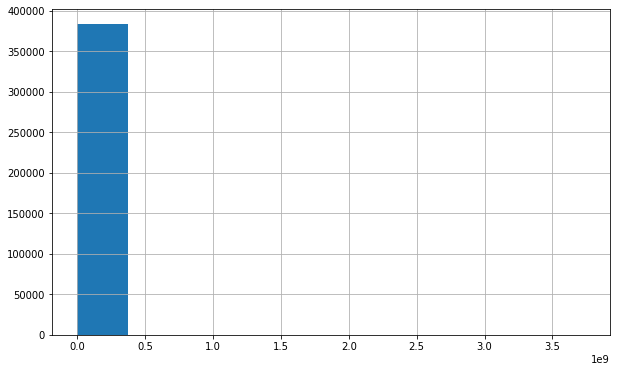

In [14]:
cars_df['price'].hist()

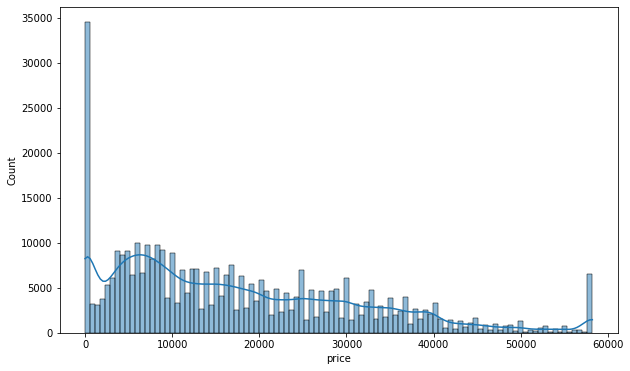

In [ ]:
#Al realizar el histograma sin el analisis de los datos, podemos obtener el histograma con matplotlib para el dataframe considerando la columna "price", 
#sin embargo, al realizar todo el analisis de datos e intentar generar el histograma despues de borrar los registros en el ejercicio 2b, colab nos comienza a marcar error
sns.histplot(cars_df['price'], kde = True)

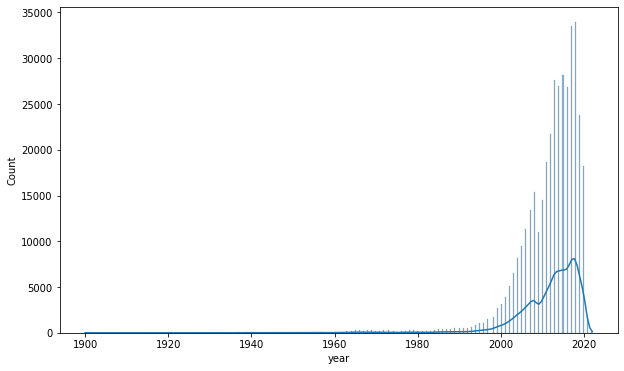

In [15]:
sns.histplot(cars_df['year'], kde = True)

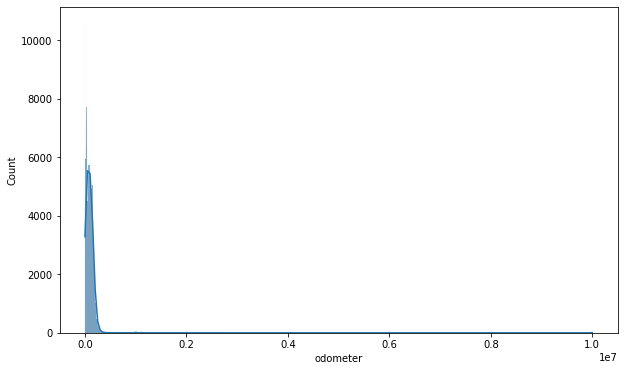

In [16]:
sns.histplot(cars_df['odometer'], kde = True)

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable. 

In [17]:
cars_df['age'] = 2023 - cars_df['year']
cars_df = cars_df.drop(columns=['year'])
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,9.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,13.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,3.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,6.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,4.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,3.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,3.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,5.0


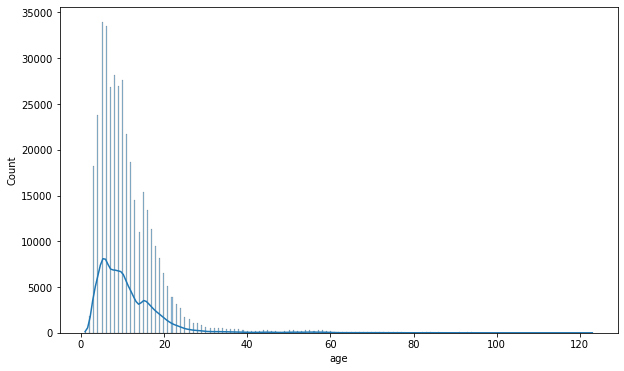

In [18]:
sns.histplot(cars_df['age'], kde = True)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

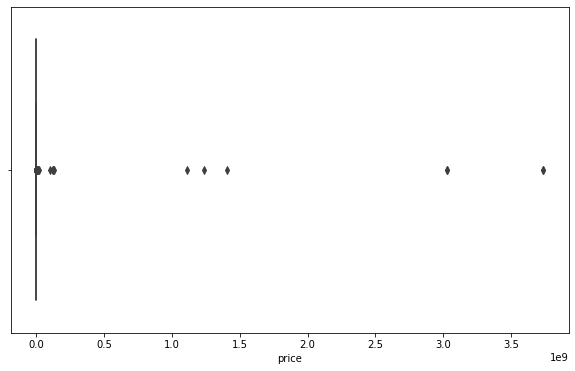

In [19]:
sns.boxplot(x = cars_df['price'])

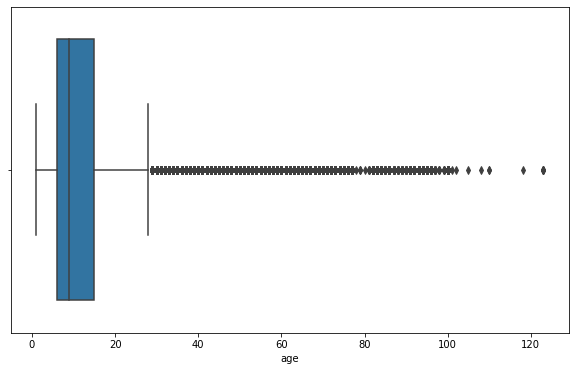

In [20]:
sns.boxplot(x = cars_df['age'])

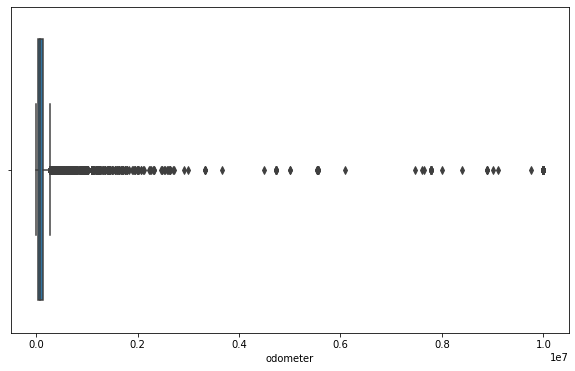

In [21]:
sns.boxplot(x = cars_df['odometer'])

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [22]:
def get_outliers_bm(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    BM = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    return BM

def get_outliers_percentage(df, column):
    outliers = df[get_outliers_bm(df, column)]
    
    outliers_percentage = len(outliers) / len(df) * 100
    return outliers_percentage

def get_upper_cap(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q3+IQR*1.5

In [23]:
print("Porcentaje de valores atípicos de 'price': ", get_outliers_percentage(cars_df, 'price'))
print("Porcentaje de valores atípicos de 'age': ", get_outliers_percentage(cars_df, 'age'))
print("Porcentaje de valores atípicos de 'odometer': ", get_outliers_percentage(cars_df, 'odometer'))
#Ninguna de las variables presentó un porcentaje mayor al 5% de valores atípicos, es seguro eliminarlos.

Porcentaje de valores atípicos de 'price':  1.6388996816075556
Porcentaje de valores atípicos de 'age':  3.1351616343623934
Porcentaje de valores atípicos de 'odometer':  0.8130611308277422


In [24]:
cars_df.loc[cars_df[get_outliers_bm(cars_df, 'price')].index,'price'] = get_upper_cap(cars_df, 'price')

In [25]:
cars_df.loc[cars_df[get_outliers_bm(cars_df, 'age')].index,'age'] = get_upper_cap(cars_df, 'age')

In [26]:
cars_df.loc[cars_df[get_outliers_bm(cars_df, 'odometer')].index,'odometer'] = get_upper_cap(cars_df, 'odometer')

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers. 

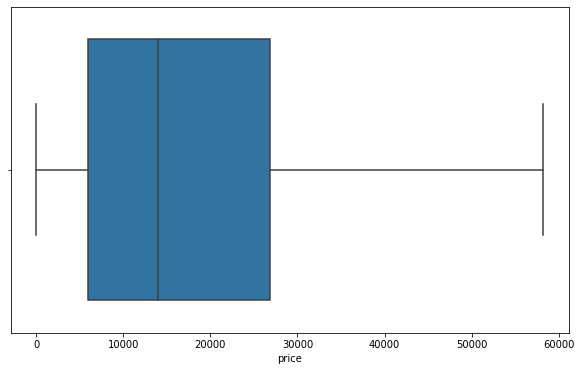

In [27]:
sns.boxplot(x = cars_df['price'])

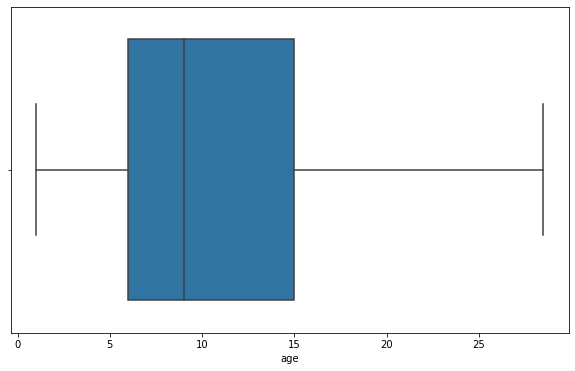

In [28]:
sns.boxplot(x = cars_df['age'])

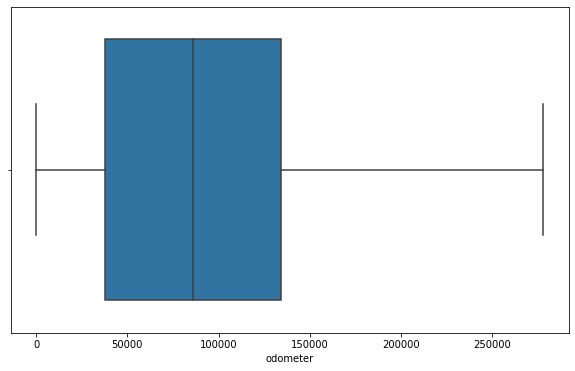

In [29]:
sns.boxplot(x = cars_df['odometer'])

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas 

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([    0. ,     0. ,     0. , ..., 58221.5, 58221.5, 58221.5])),
 (13503.992977771433, 17365.458473385155, 0.9608649379195134))

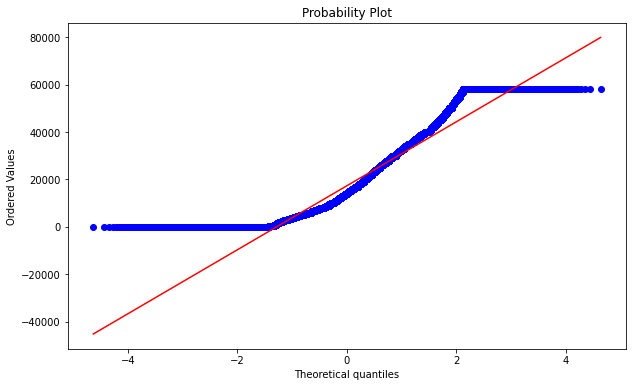

In [30]:
stats.probplot(cars_df['price'], dist="norm", plot=plt)

((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([ 1. ,  1. ,  1. , ..., 28.5, 28.5, 28.5])),
 (5.937107251234567, 10.877225943899303, 0.9534862316241839))

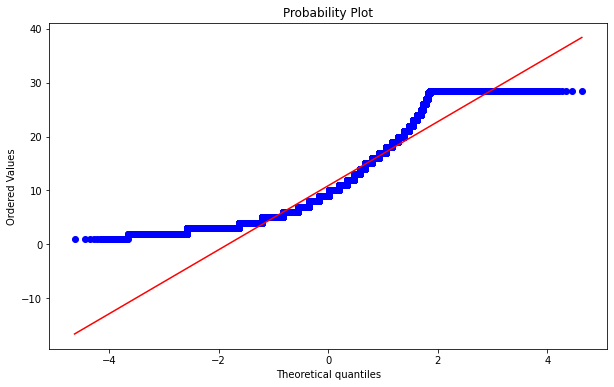

In [31]:
stats.probplot(cars_df['age'], dist="norm", plot=plt)

((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([     0.,      0.,      0., ..., 278000., 278000., 278000.])),
 (61037.42265991224, 91656.97469549322, 0.9789009283131761))

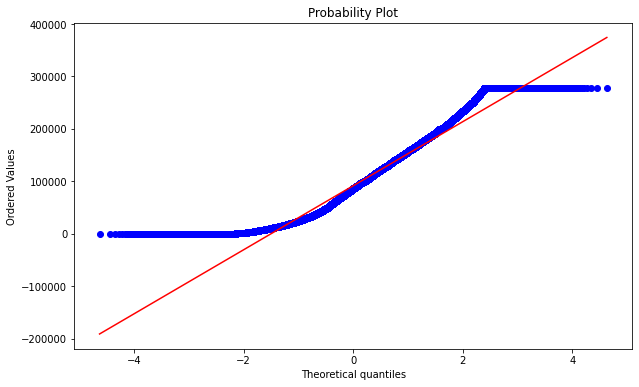

In [32]:
stats.probplot(cars_df['odometer'], dist="norm", plot=plt)

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [33]:
transf_df = cars_df.copy()

In [34]:
from sklearn.preprocessing import PowerTransformer

In [35]:
transformer = PowerTransformer(method="yeo-johnson")
transformer.fit(transf_df[['price']])
transf_df['price'] = transformer.transform(transf_df[['price']])

In [36]:
transformer.fit(transf_df[['age']])
transf_df['age'] = transformer.transform(transf_df[['age']])

In [37]:
transformer.fit(transf_df[['odometer']])
transf_df['odometer'] = transformer.transform(transf_df[['odometer']])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([-2.17057705, -2.17057705, -2.17057705, ...,  1.90956988,
          1.90956988,  1.90956988])),
 (0.9835735069733085, -4.550416420637628e-16, 0.9835610438638919))

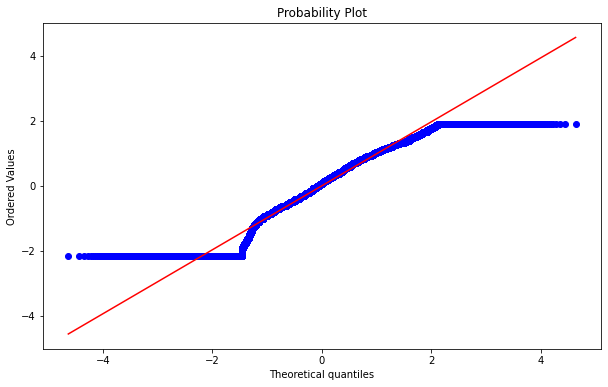

In [38]:
stats.probplot(transf_df['price'], dist="norm", plot=plt)

((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([-3.2425514 , -3.2425514 , -3.2425514 , ...,  2.00695365,
          2.00695365,  2.00695365])),
 (0.991635086014896, -5.026272305496608e-16, 0.9916225207551667))

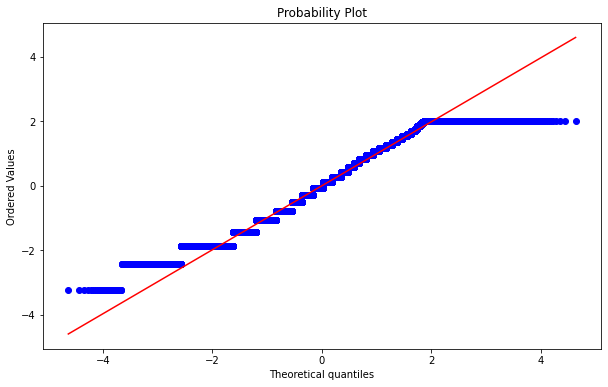

In [39]:
stats.probplot(transf_df['age'], dist="norm", plot=plt)

((array([-4.63237484, -4.44535489, -4.34401873, ...,  4.34401873,
          4.44535489,  4.63237484]),
  array([-2.43360865, -2.43360865, -2.43360865, ...,  2.18739993,
          2.18739993,  2.18739993])),
 (0.9936944758755571, -2.417868070650632e-16, 0.9936818845207762))

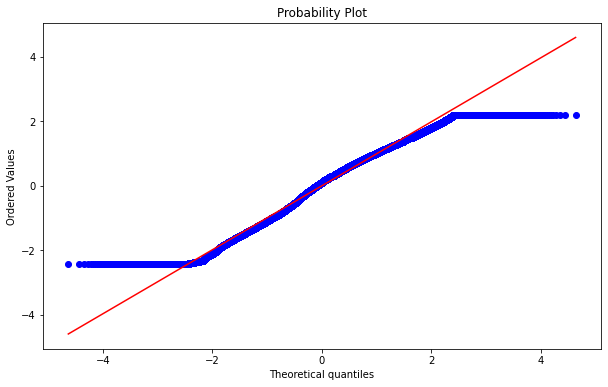

In [40]:
stats.probplot(transf_df['odometer'], dist="norm", plot=plt)

## Escalando variables numéricas

6a) Como las variables poseen diferentes escalas, aplica el método Min-Max para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [41]:
minmax_df = transf_df.copy()

In [42]:
from sklearn import preprocessing

In [43]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
cols_to_scale = ['age', 'price', 'odometer']
minmax_df[cols_to_scale] = scaler.fit_transform(minmax_df[cols_to_scale])

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

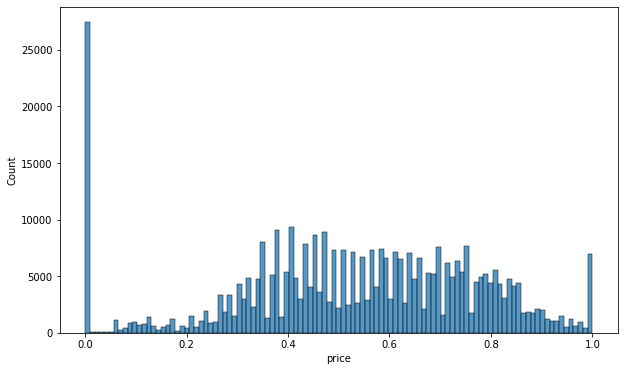

In [44]:
sns.histplot(minmax_df['price'])

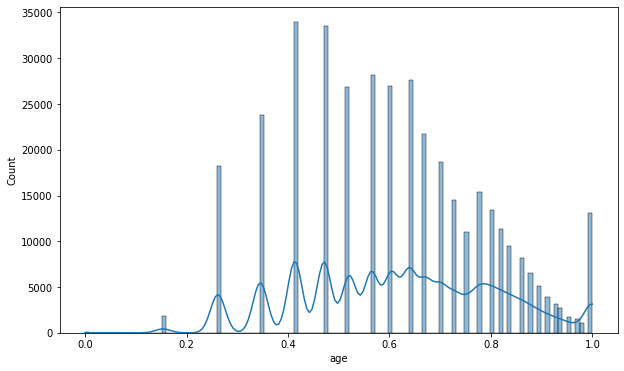

In [46]:
sns.histplot(minmax_df['age'], kde = True)

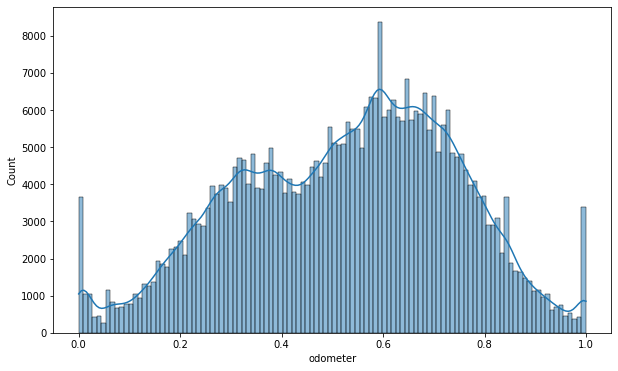

In [47]:
sns.histplot(minmax_df['odometer'], kde = True)

sns.histplot(cars_df['price'], kde = True)

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas. 

In [48]:
cars_df.describe(include = 'object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,383489,383489,383489,383489,383489,383489,383489,383489,383489
unique,404,413,41,21785,5,6,3,13,51
top,columbus,https://reno.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3146,2852,66718,7500,324803,371046,303793,162013,45055


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [49]:
#Se decidió considerar como cardinalidad alta las variables con más de 13 valores distintos
highly_cardinal_variables  = ['region', 'region_url', 'manufacturer', 'model', 'state']
few_cardinal_variables  = ['fuel', 'title_status', 'transmission', 'type']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

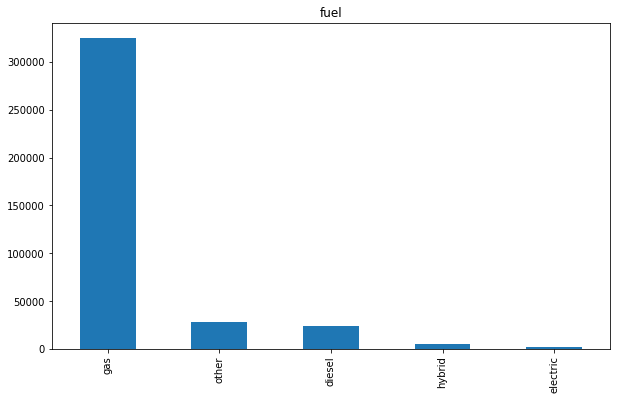

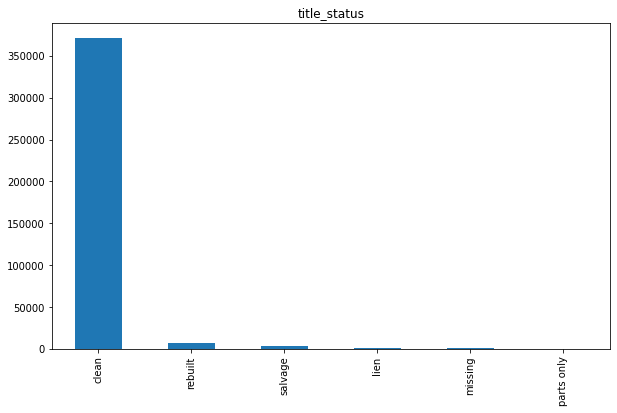

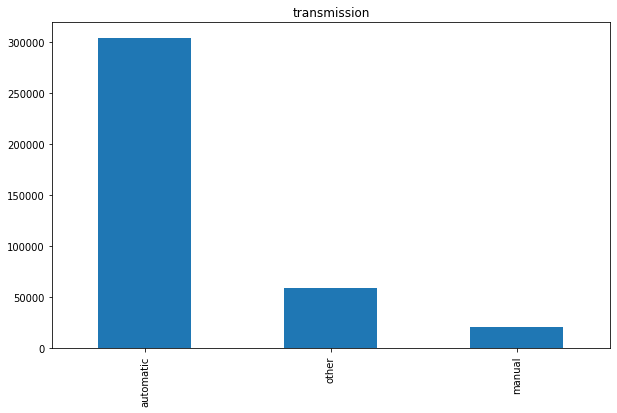

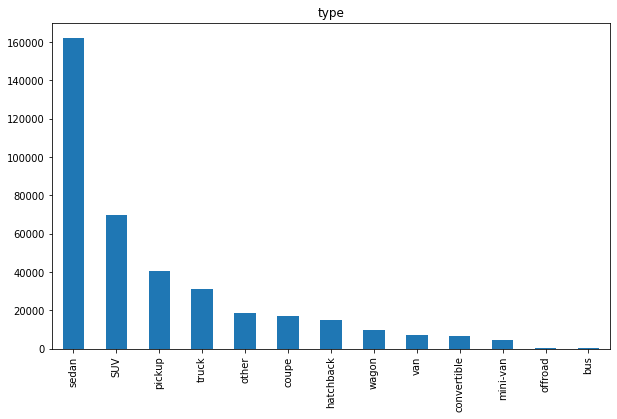

In [50]:
for var in few_cardinal_variables:
  fig, ax = plt.subplots()
  cars_df[var].value_counts().plot(kind='bar')
  ax.set_title(var)
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [51]:
temp_df = cars_df.copy()

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot = encoder.fit_transform(temp_df[few_cardinal_variables])
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names(few_cardinal_variables))
one_hot_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383485,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383486,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383487,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [53]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
binary = encoder.fit_transform(temp_df[highly_cardinal_variables])
binary.head(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.2 MB/s eta 0:00:00


,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_11,model_12,model_13,model_14,state_0,state_1,state_2,state_3,state_4,state_5
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
30,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
31,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
32,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
33,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,1
34,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
35,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
36,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [54]:
minmax_df.reset_index(drop=True, inplace=True)
one_hot_df.reset_index(drop=True, inplace=True)
binary.reset_index(drop=True, inplace=True)

encoded_df = pd.concat([minmax_df, one_hot_df, binary], axis=1)
encoded_df.drop(few_cardinal_variables + highly_cardinal_variables, axis=1, inplace=True)
encoded_df

,price,odometer,lat,long,age,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,model_11,model_12,model_13,model_14,state_0,state_1,state_2,state_3,state_4,state_5
0,0.793253,0.449410,32.590000,-85.480000,0.603436,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,0.670926,0.499438,32.590000,-85.480000,0.727549,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.850152,0.255296,32.590000,-85.480000,0.261881,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1
3,0.766751,0.377288,32.590000,-85.480000,0.471105,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0.564164,0.673485,32.592000,-85.518900,0.638664,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383484,0.683321,0.333089,33.786500,-84.445400,0.345543,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,1,1,0,0,1,1
383485,0.762560,0.201119,33.786500,-84.445400,0.261881,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,1,0,0,1,1
383486,0.807029,0.116697,33.779214,-84.411811,0.261881,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,1,0,0,1,1
383487,0.745468,0.321733,33.786500,-84.445400,0.413668,0.0,0.0,1.0,0.0,0.0,...,1,1,0,1,1,1,0,0,1,1
